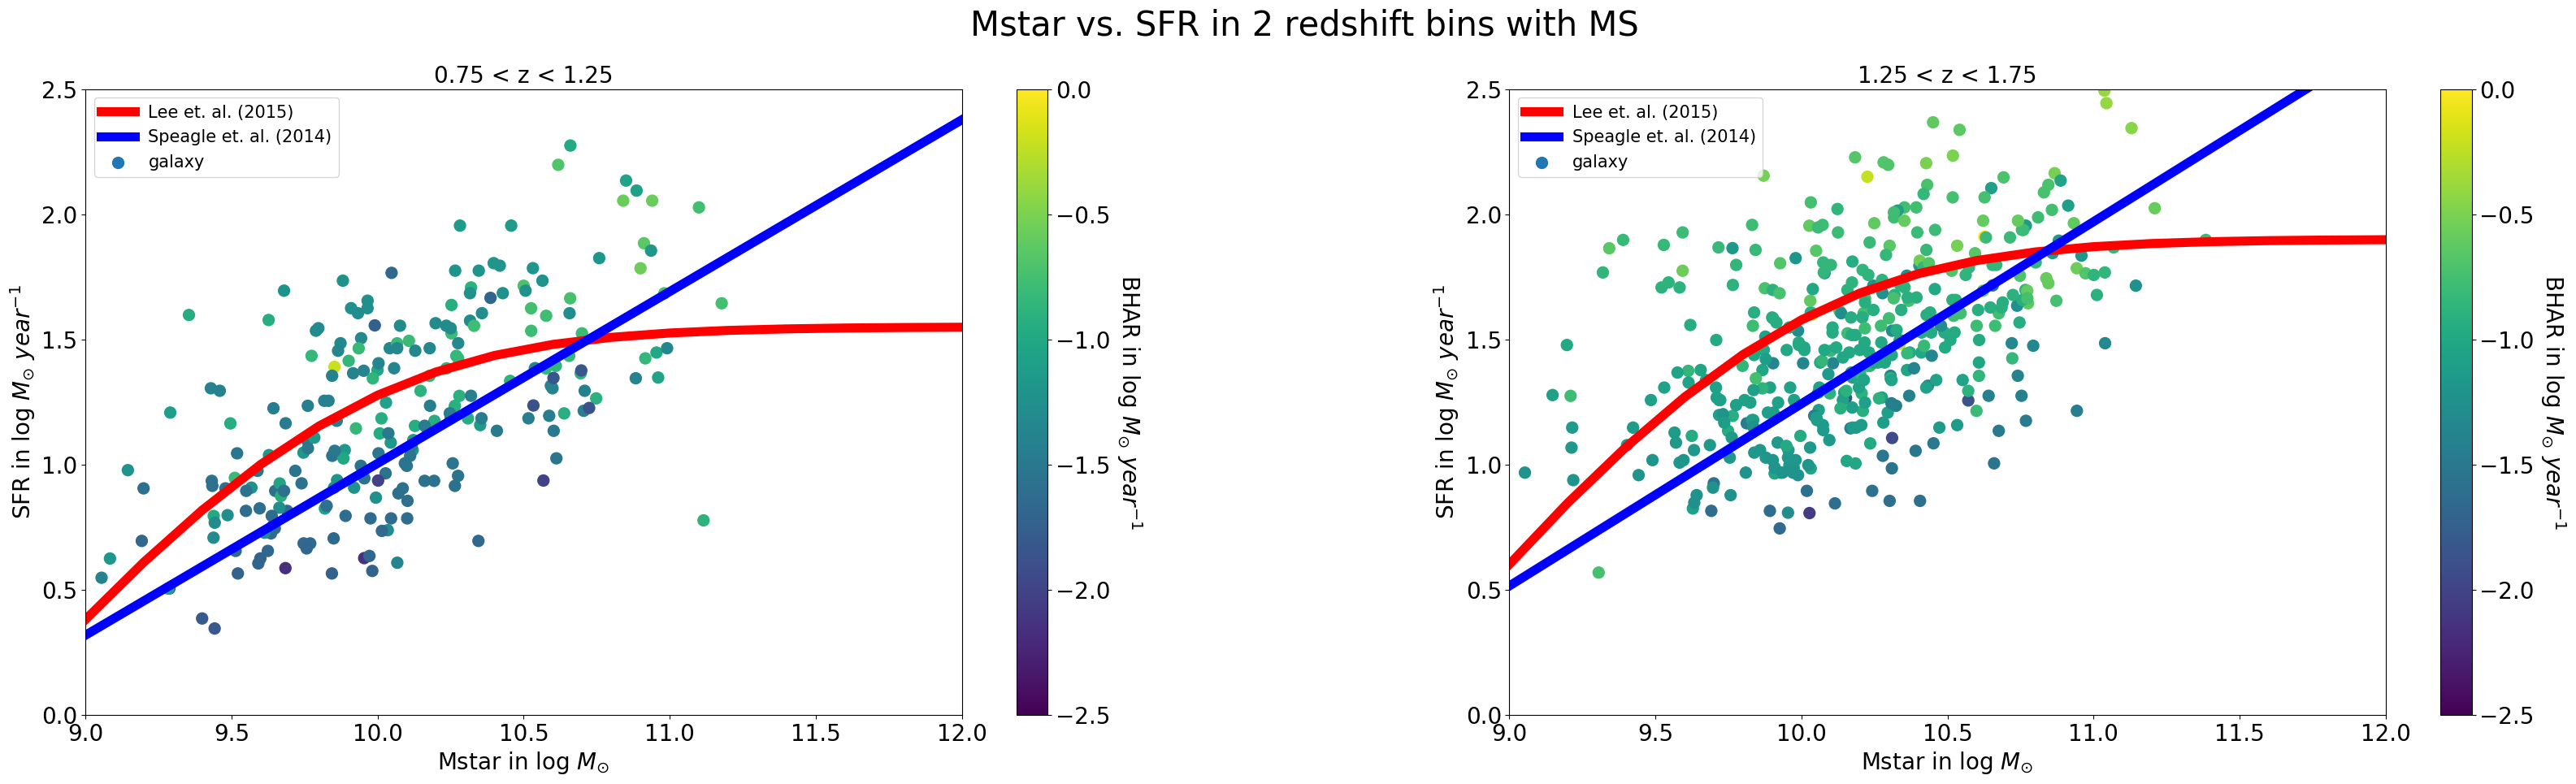

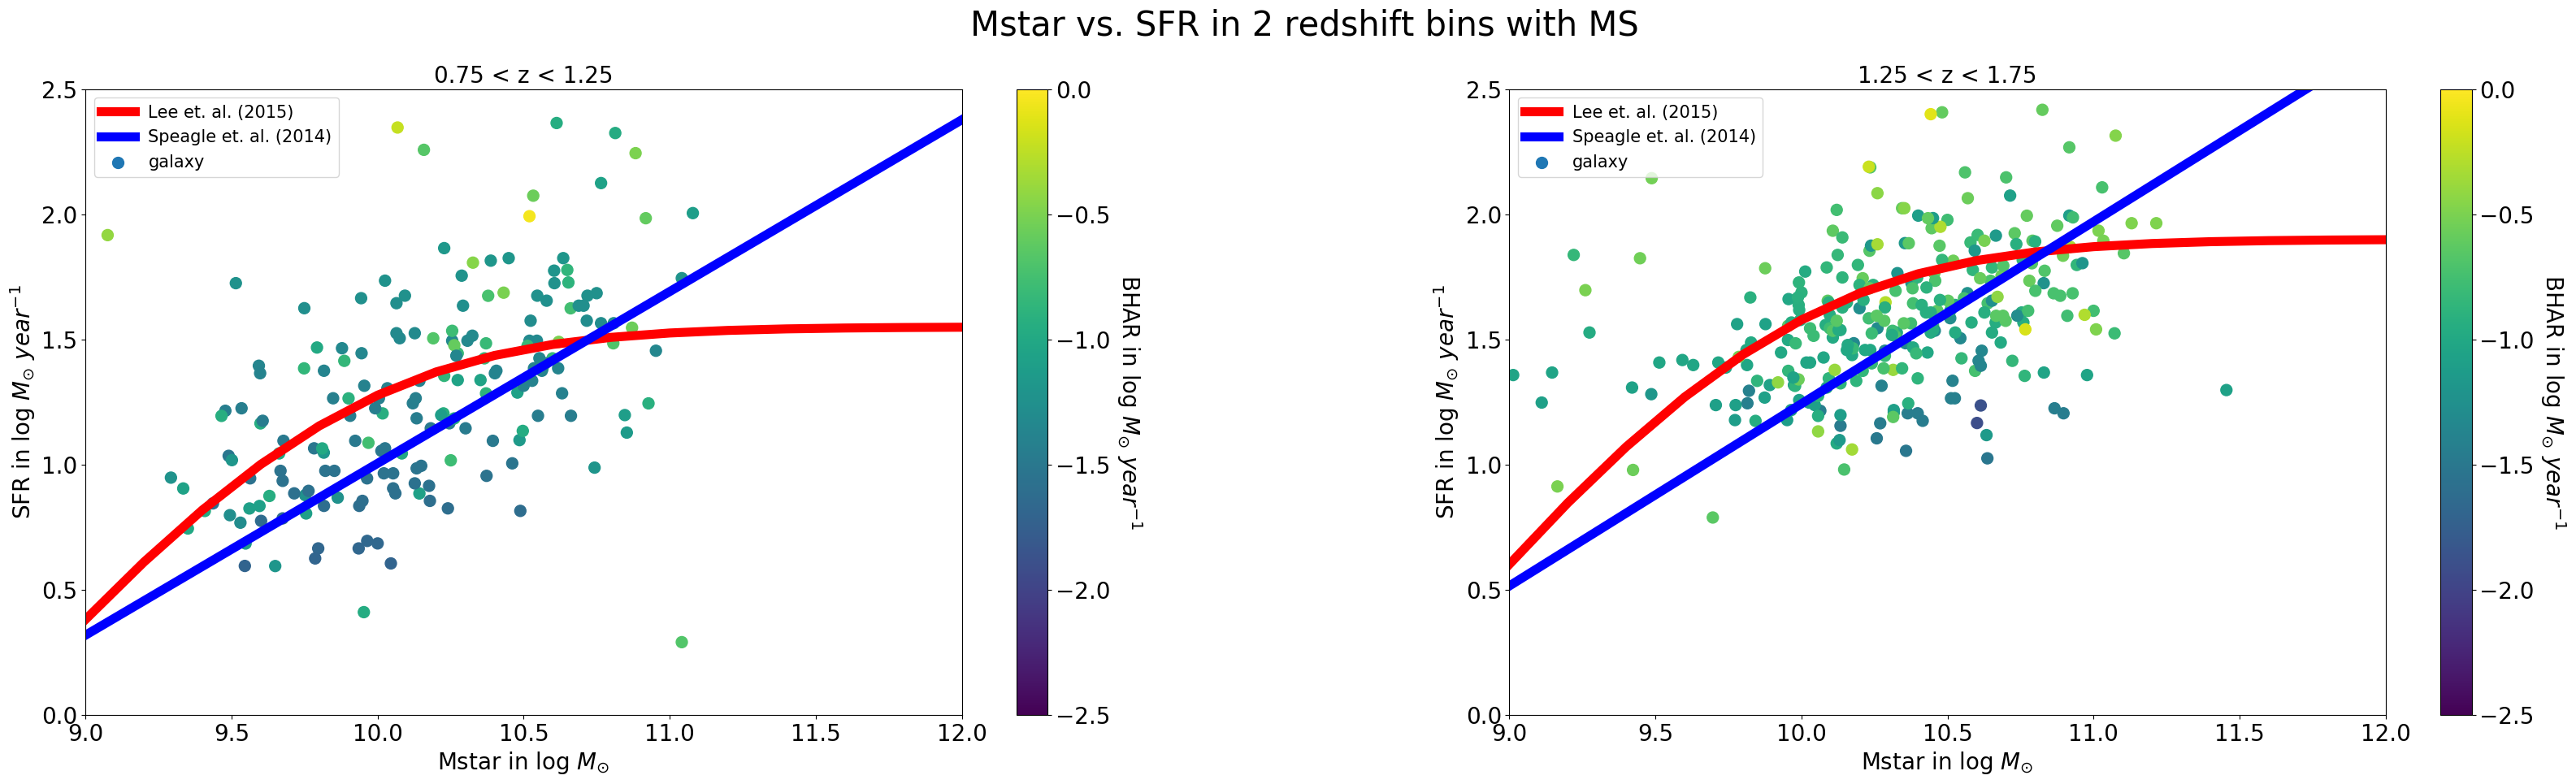

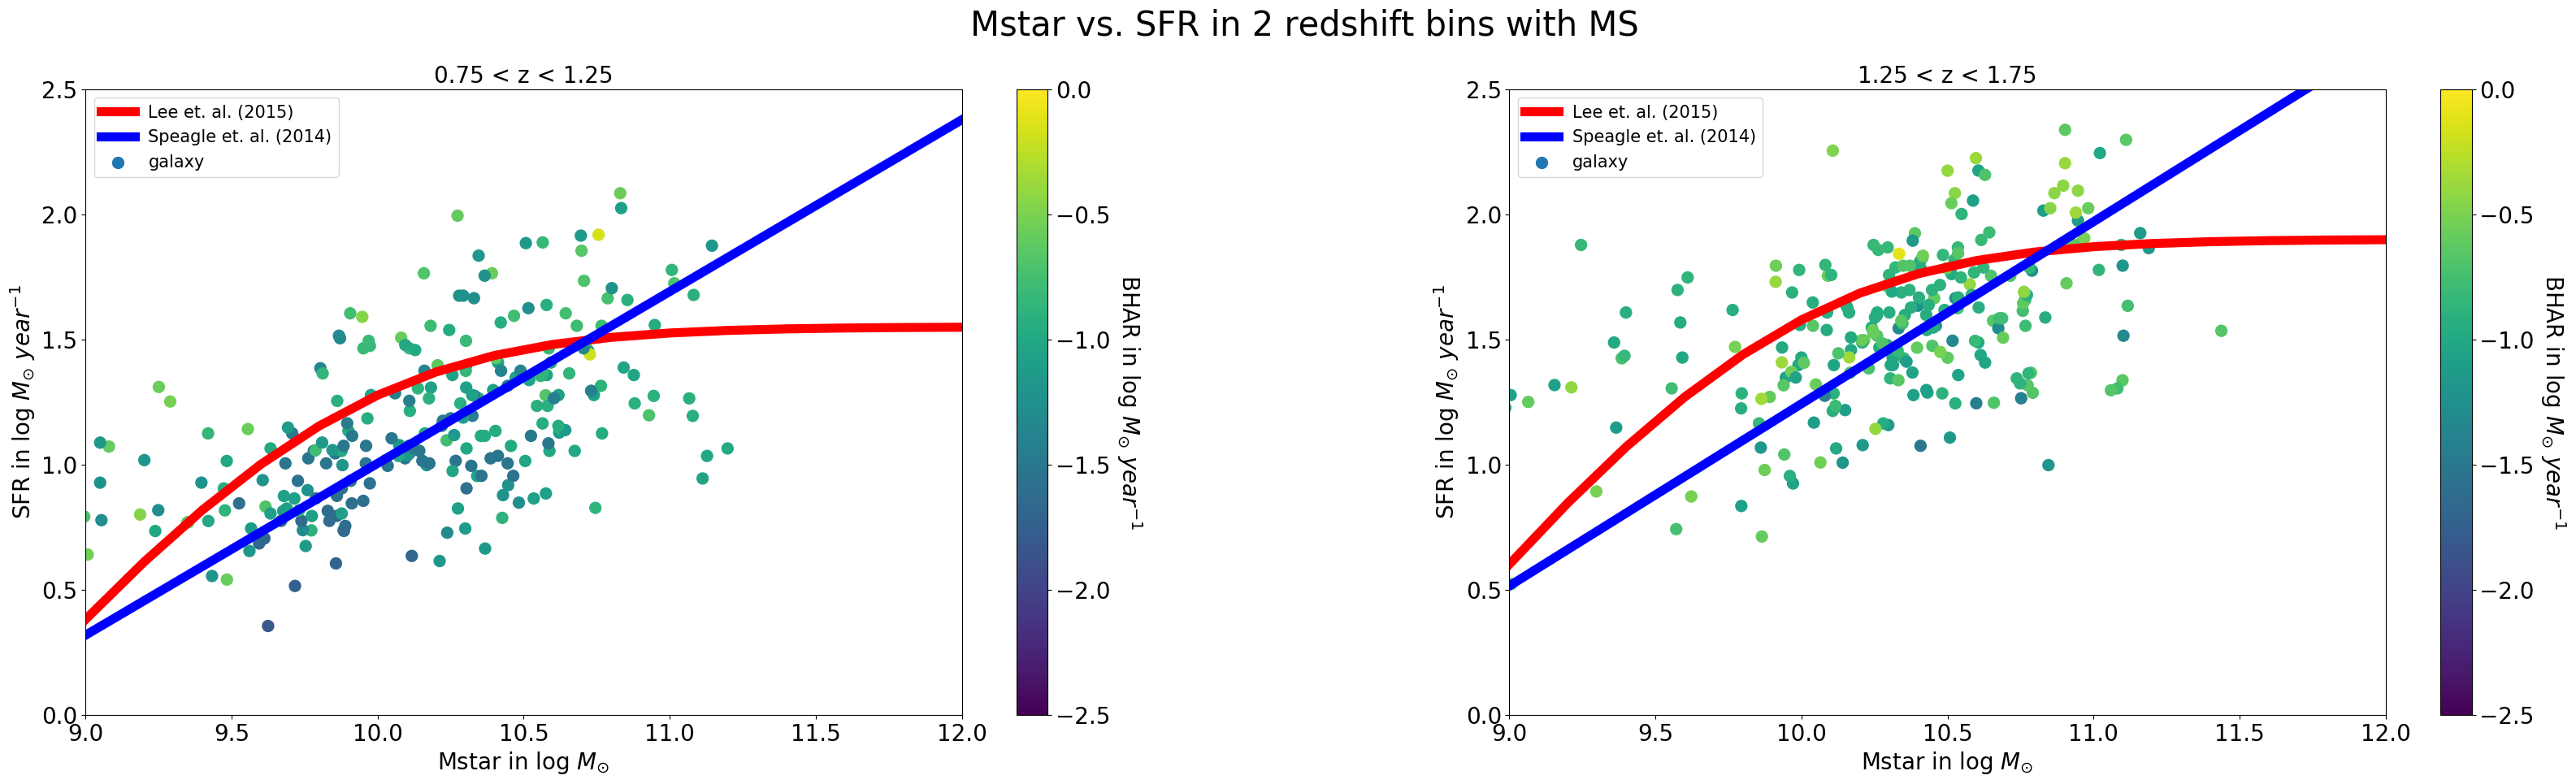

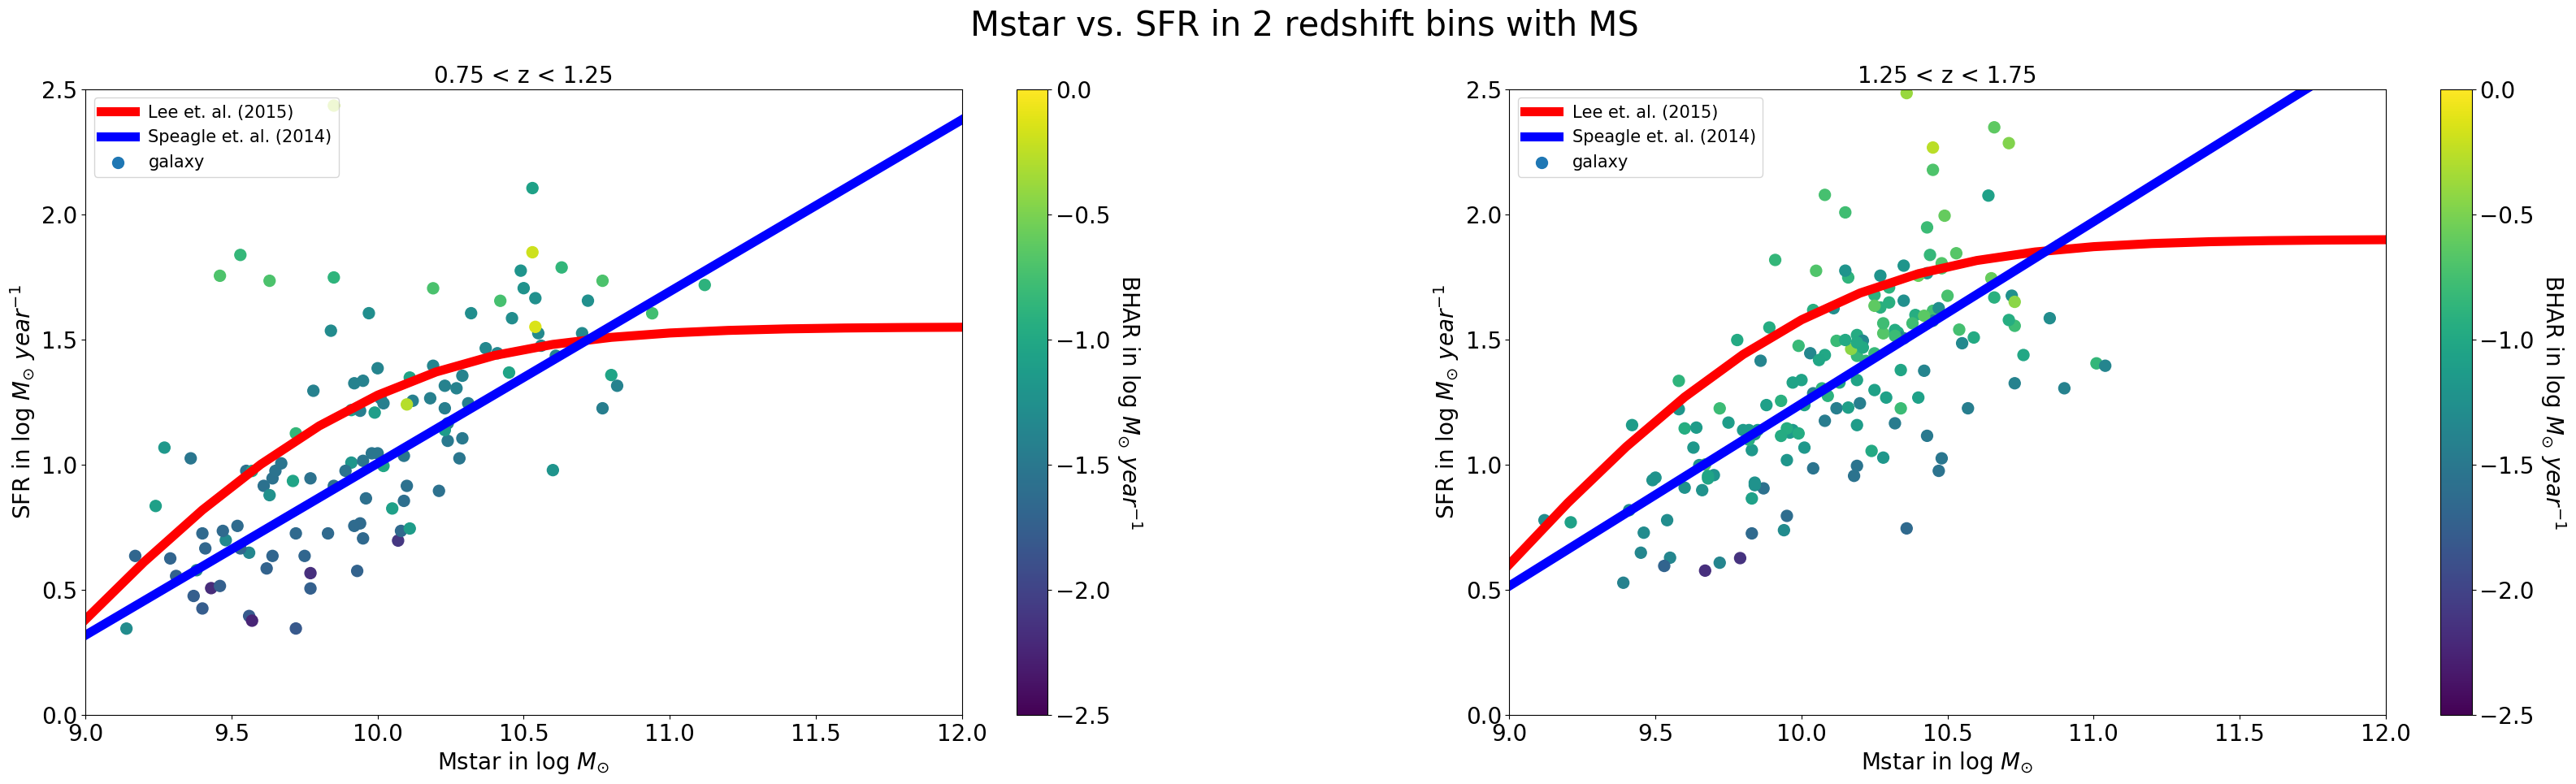

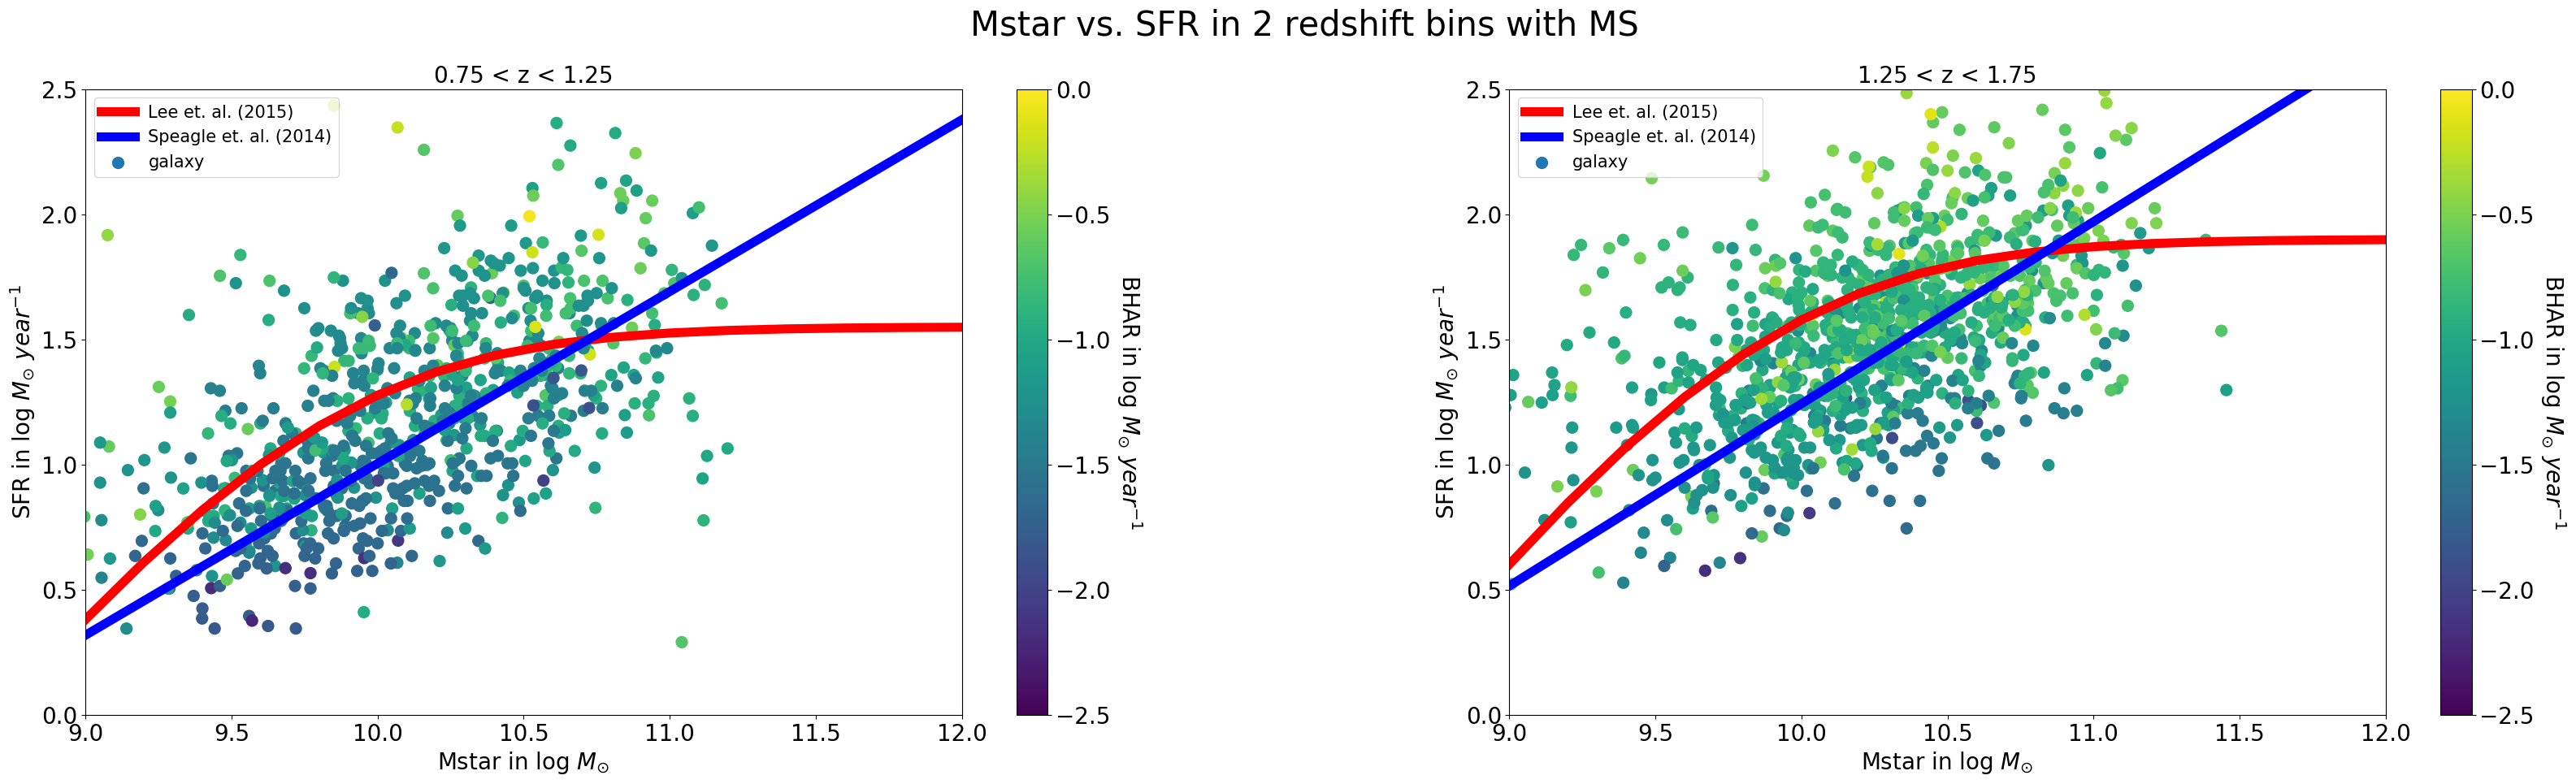

In [1]:
#------------Main Sequence: Mstar vs. SFR-----------

#import stuff
from astropy.io import fits, ascii
import matplotlib.pyplot as plt
from astropy.table import Table, join
import numpy as np
%config InlineBackend.rc = {}
import matplotlib
matplotlib.rc_file("anaconda/lib/python2.7/site-packages/matplotlib/mpl-data/matplotlibrc")
%matplotlib inline
from matplotlib import cm


from astropy import cosmology
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=69.6, Om0=0.286)

def makeFig(k, v):
    
    #Setting up the figure
    fig = plt.figure()
    fig.set_size_inches(40,10)
    fig.suptitle('Mstar vs. SFR in 2 redshift bins with MS', fontsize=30)

    t = ascii.read(k+'_z.txt')

    #lists
    ax = []
    colorm = []
    scat = []
    cb = []
    zbin = v
    
    titles = ['0.75','1.25','1.75','2.25']
    redshifts = [1,1.5,2]
    Mstar = np.arange(9, 13, 0.2)

    for j in range(2): 
        colorm.append(None)
        scat.append(None)
        cb.append(None)
    
    #Function for the main sequence line, turnover
    def ms_turn(z, Mstar):
        #From Lee et. al. in the form 
        # S = S0 - log[1+(10^M/10^M0) ^-gamma]
        if z == 1:
            #ms_turn = 1.3-0.76*np.log10(1+(2*10**10)/(10**Mstar))
            ms_turn = 1.55 - np.log10(1+(10**10.1)/(10**Mstar))**1.25
        elif z==1.5:
            #ms_turn = 2.49-1.45*np.log10(1+(2*10**10)/(10**Mstar))
            ms_turn = 1.9 - np.log10(1+(10**10.2)/(10**Mstar))**1.28
        #elif z==2:
            #ms_turn = 4.23-2.46*np.log10(1+(2*10**10)/(10**Mstar))

        return ms_turn
    
    #Function for the main sequence line, linear
    def ms_lin(z, Mstar):
        #log sfr(Mstar, t in Gyr) = the function
        t = cosmo.age(z).value
        ms_lin = (0.84 - 0.026 * t) * Mstar - (6.51 - 0.11 * t)
        return ms_lin

    #Setting up the grid
    for i in range(2):
        #Labels and titles
        ax.append(fig.add_subplot(1, 2, i+1))
        ax[i].set_xlabel('Mstar in log $M_{\odot}$', fontsize=20)
        ax[i].set_ylabel('SFR in log $M_{\odot}$ ${year^{-1}}$', fontsize=20)
        ax[i].set_title(titles[i] + ' < z < ' + titles[i+1], fontsize=20)

        #Axis limits
        ax[i].set_ylim(0, 2.5)
        ax[i].set_xlim(9, 12)

        #The data
        colorm[i] = t[zbin[i]:zbin[i+1]]['BHAR']
        scat[i]=ax[i].scatter(t[zbin[i]:zbin[i+1]]['M_med'], t[zbin[i]:zbin[i+1]]['sfr'],s=100,c=colorm[i],vmin=-2.5,vmax=0,cmap=cm.viridis, label='galaxy')

        cb[i] = fig.colorbar(scat[i], ax=ax[i])
        cb[i].set_label('BHAR in log $M_{\odot}$ ${year^{-1}}$', rotation=270, labelpad=30, fontsize=20)

        #Tick mark label size
        ax[i].tick_params(axis='both', which='major', labelsize=20)
        cb[i].ax.tick_params(labelsize=20) 

        #Main Sequence
        ax[i].plot(Mstar, ms_turn(redshifts[i], Mstar), 'r', lw=8, label='Lee et. al. (2015)')
        ax[i].plot(Mstar, ms_lin(redshifts[i], Mstar), 'b', lw=8, label='Speagle et. al. (2014)')

        ax[i].legend(loc='upper left', fontsize=15)

    #Tune spacing between plots. 
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=None)

    fig.savefig(k+'_Mstar_SFR_MS.png', dpi=300, bbox_inches='tight')

#----------------------------Calling the function to make graphs------------------------------------

#A dictionary of names and zbins
names = {'CANDELS': [0,812,1898,2769],
         'COS': [0,265,507, 650], 
         'EGS': [0,241,640,1015], 
         'GDS': [0,119,279,416],
         'UDS': [0,187,472,688]}

for k, v in names.items():
    makeFig(k, v)

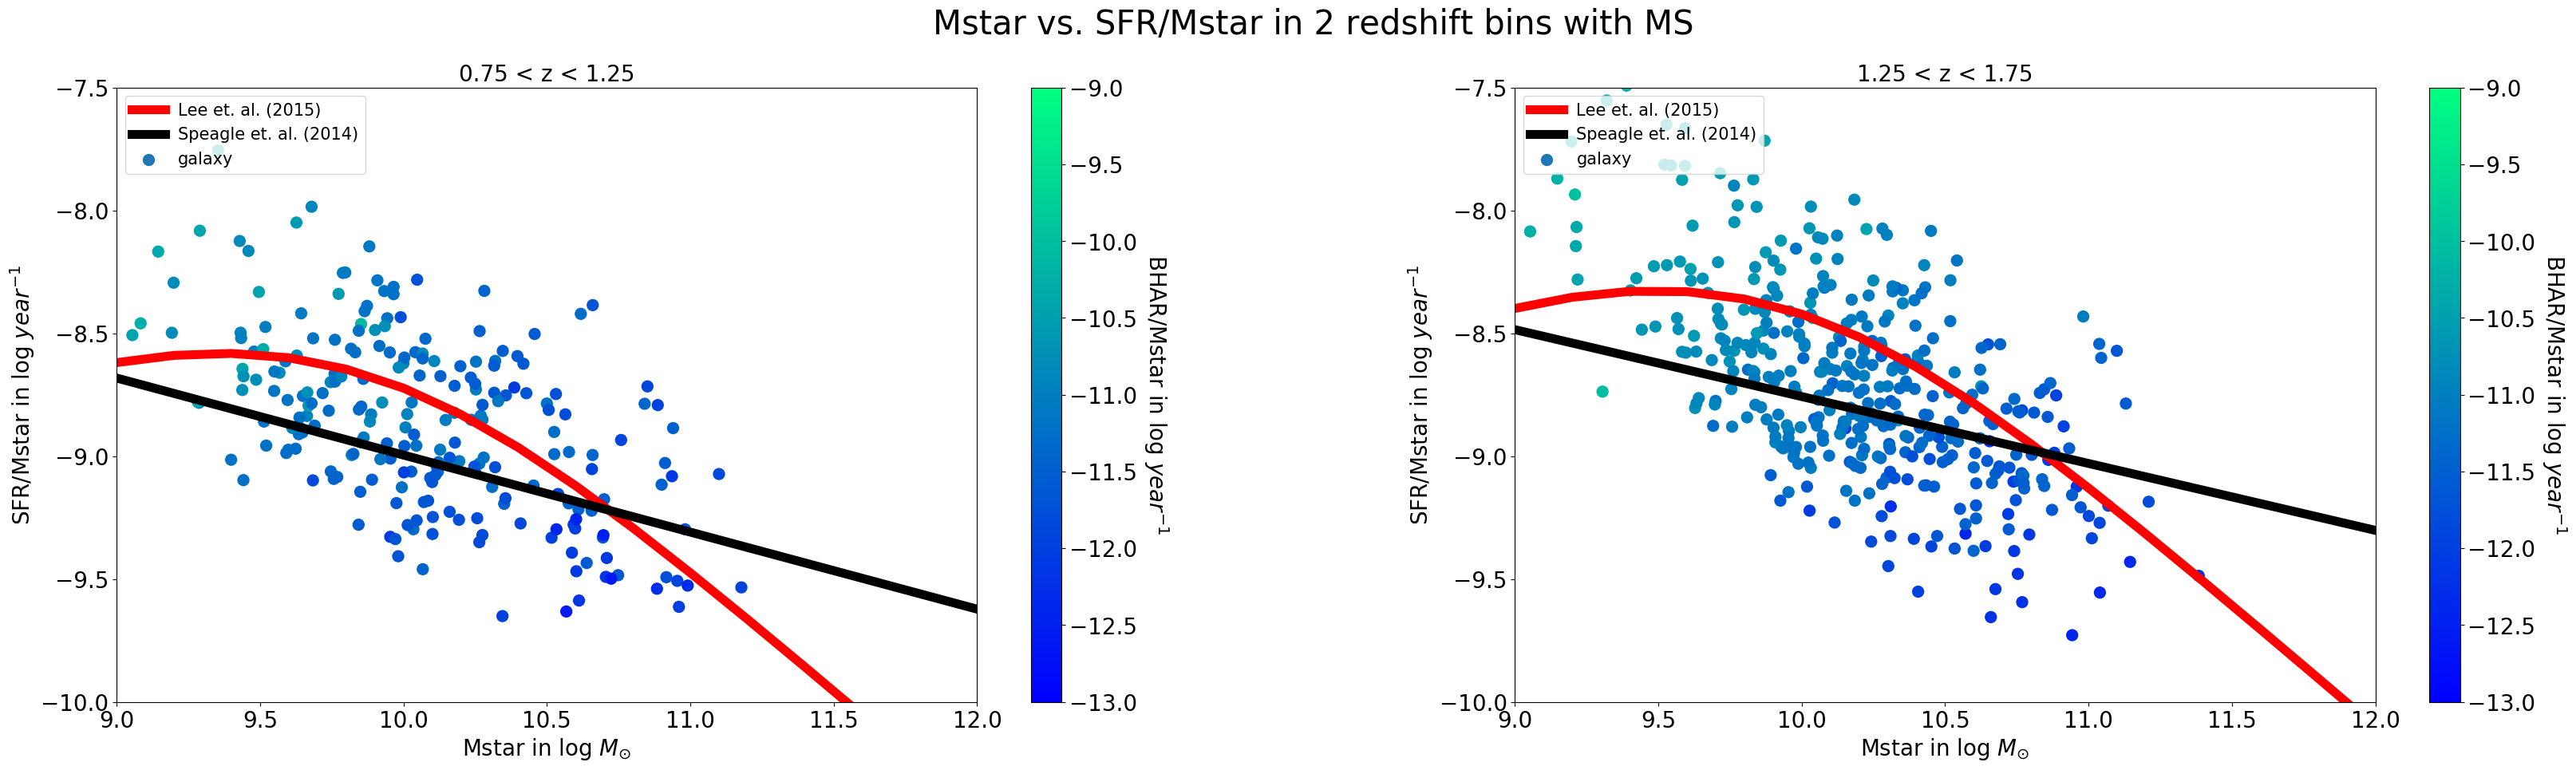

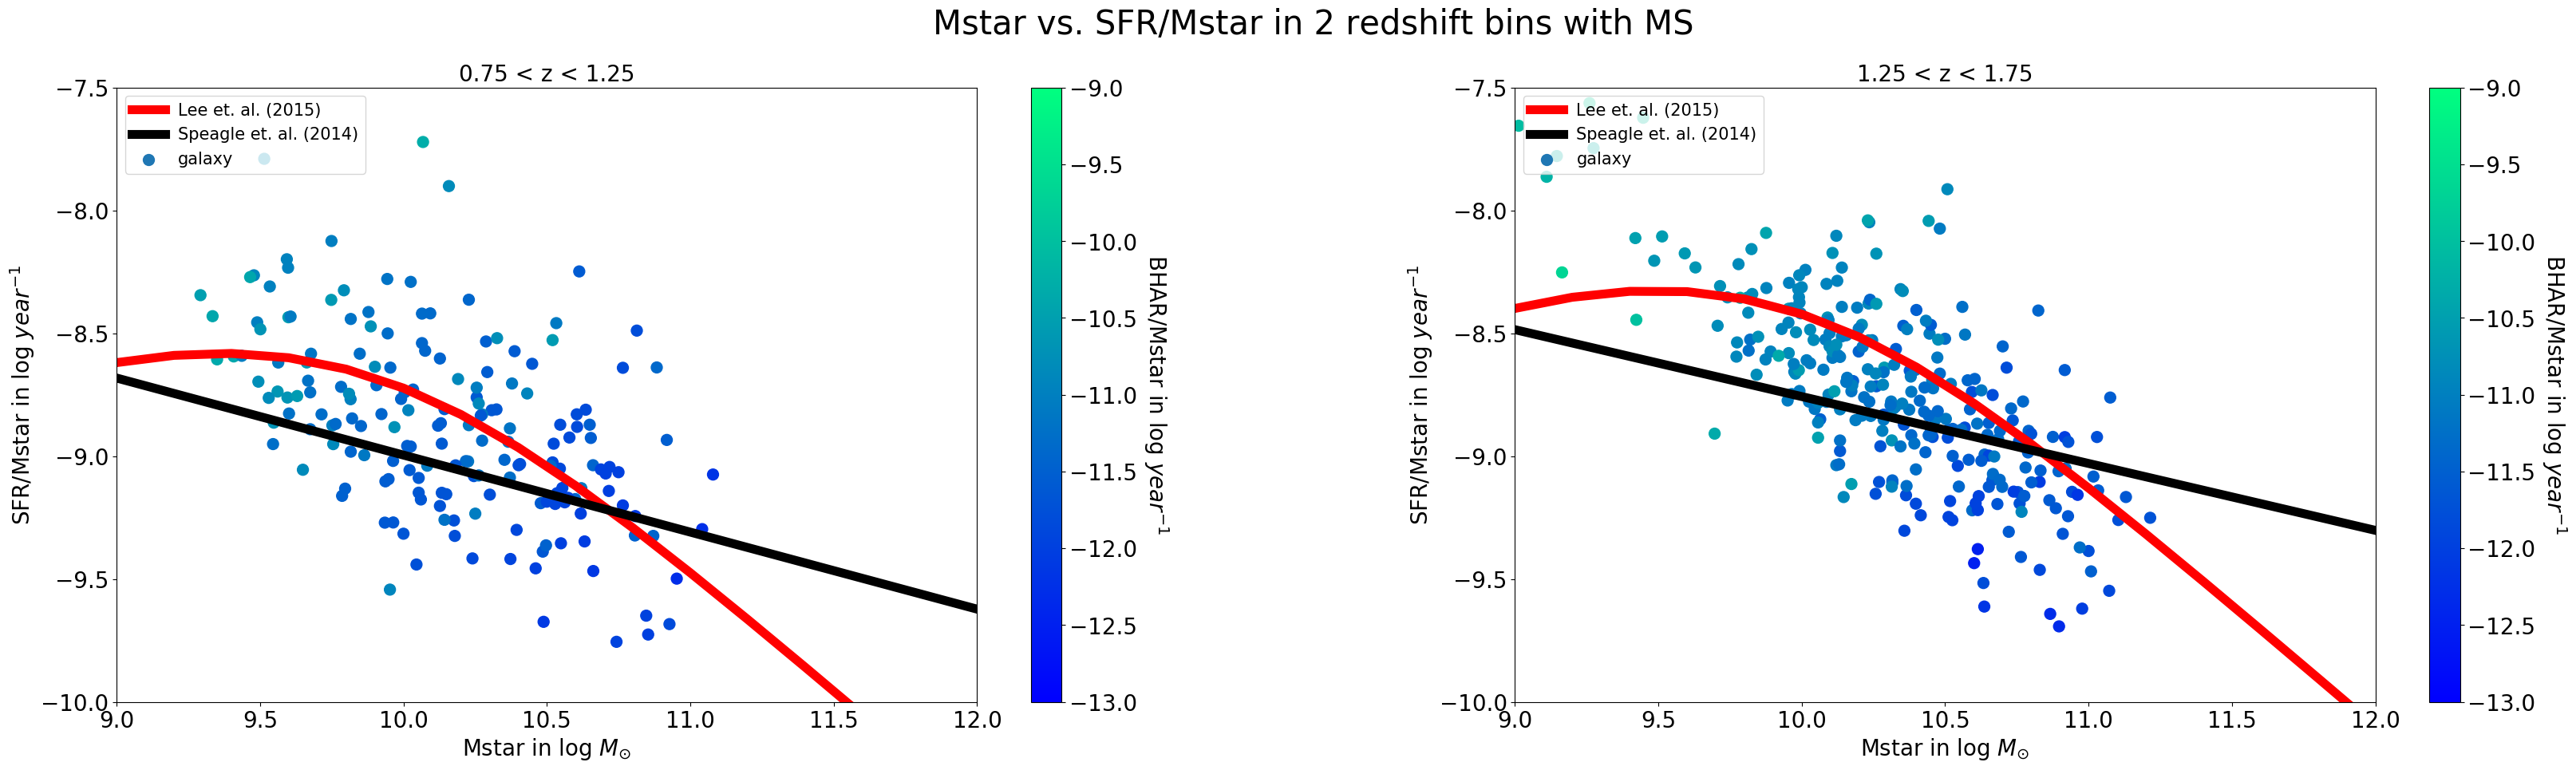

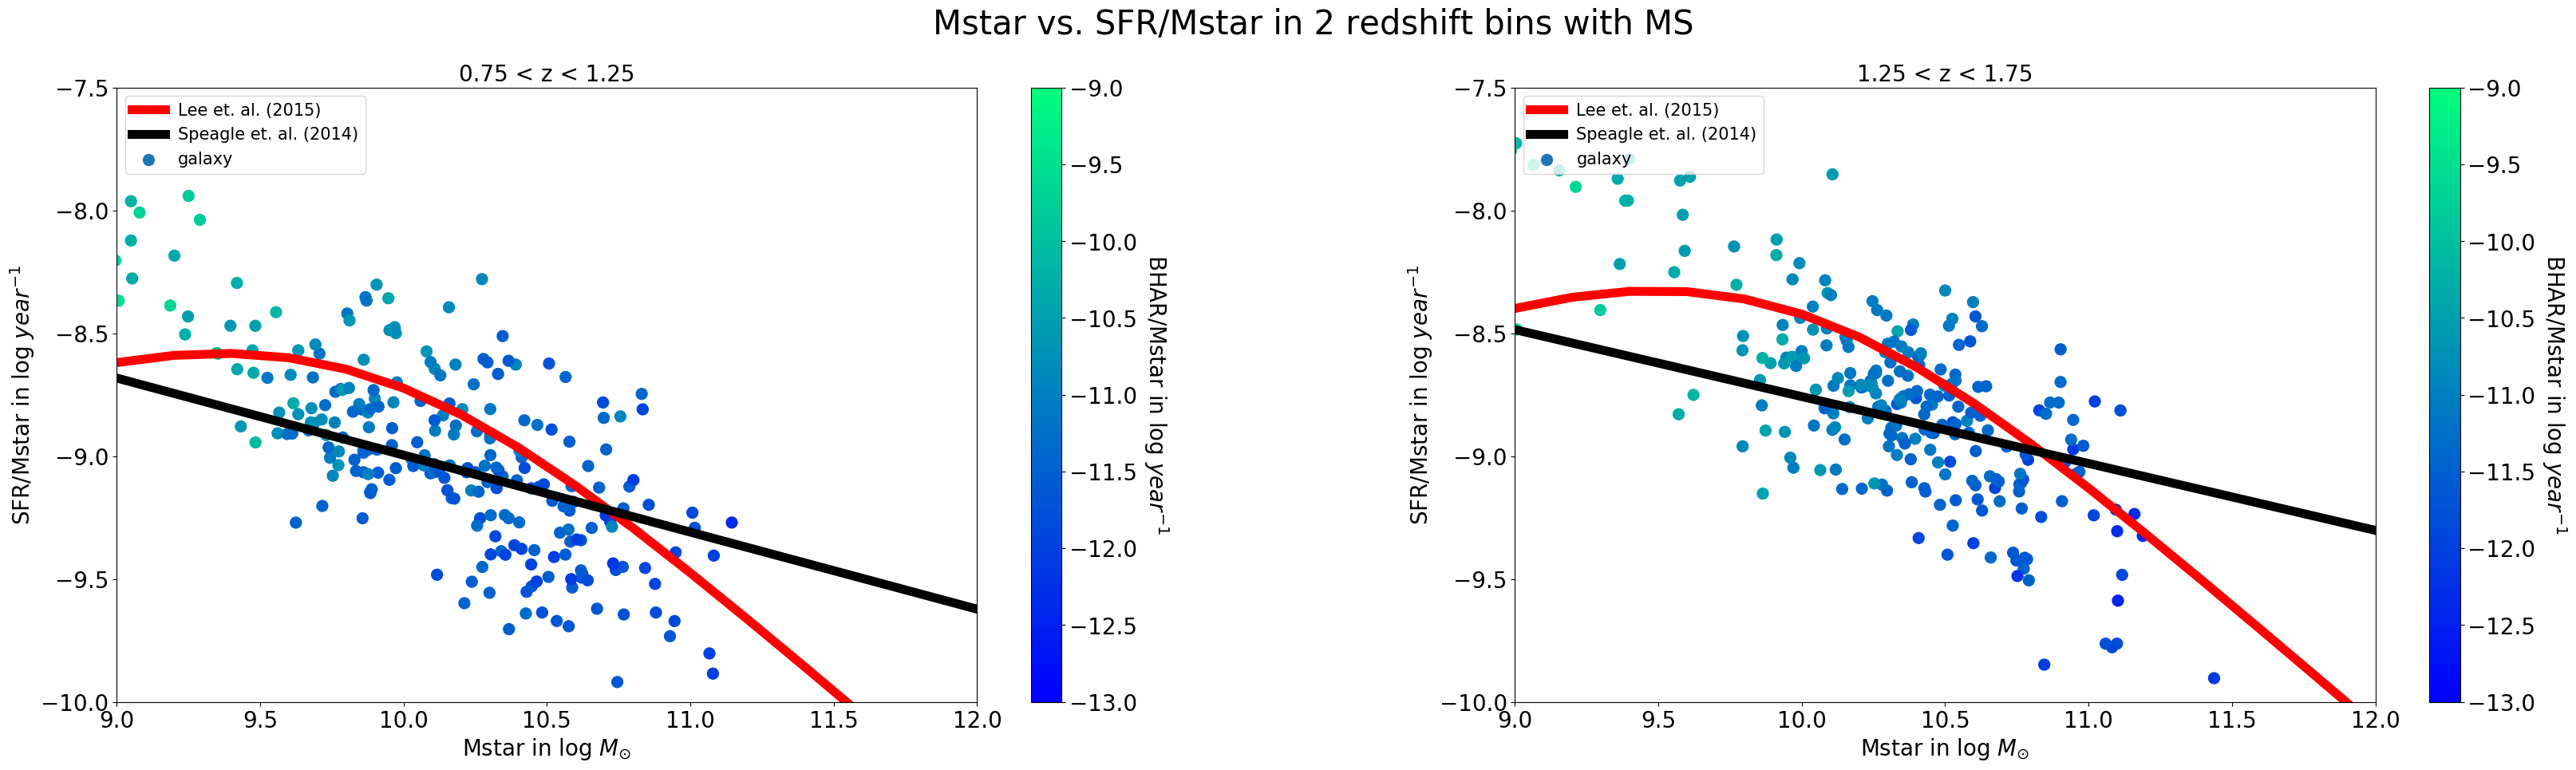

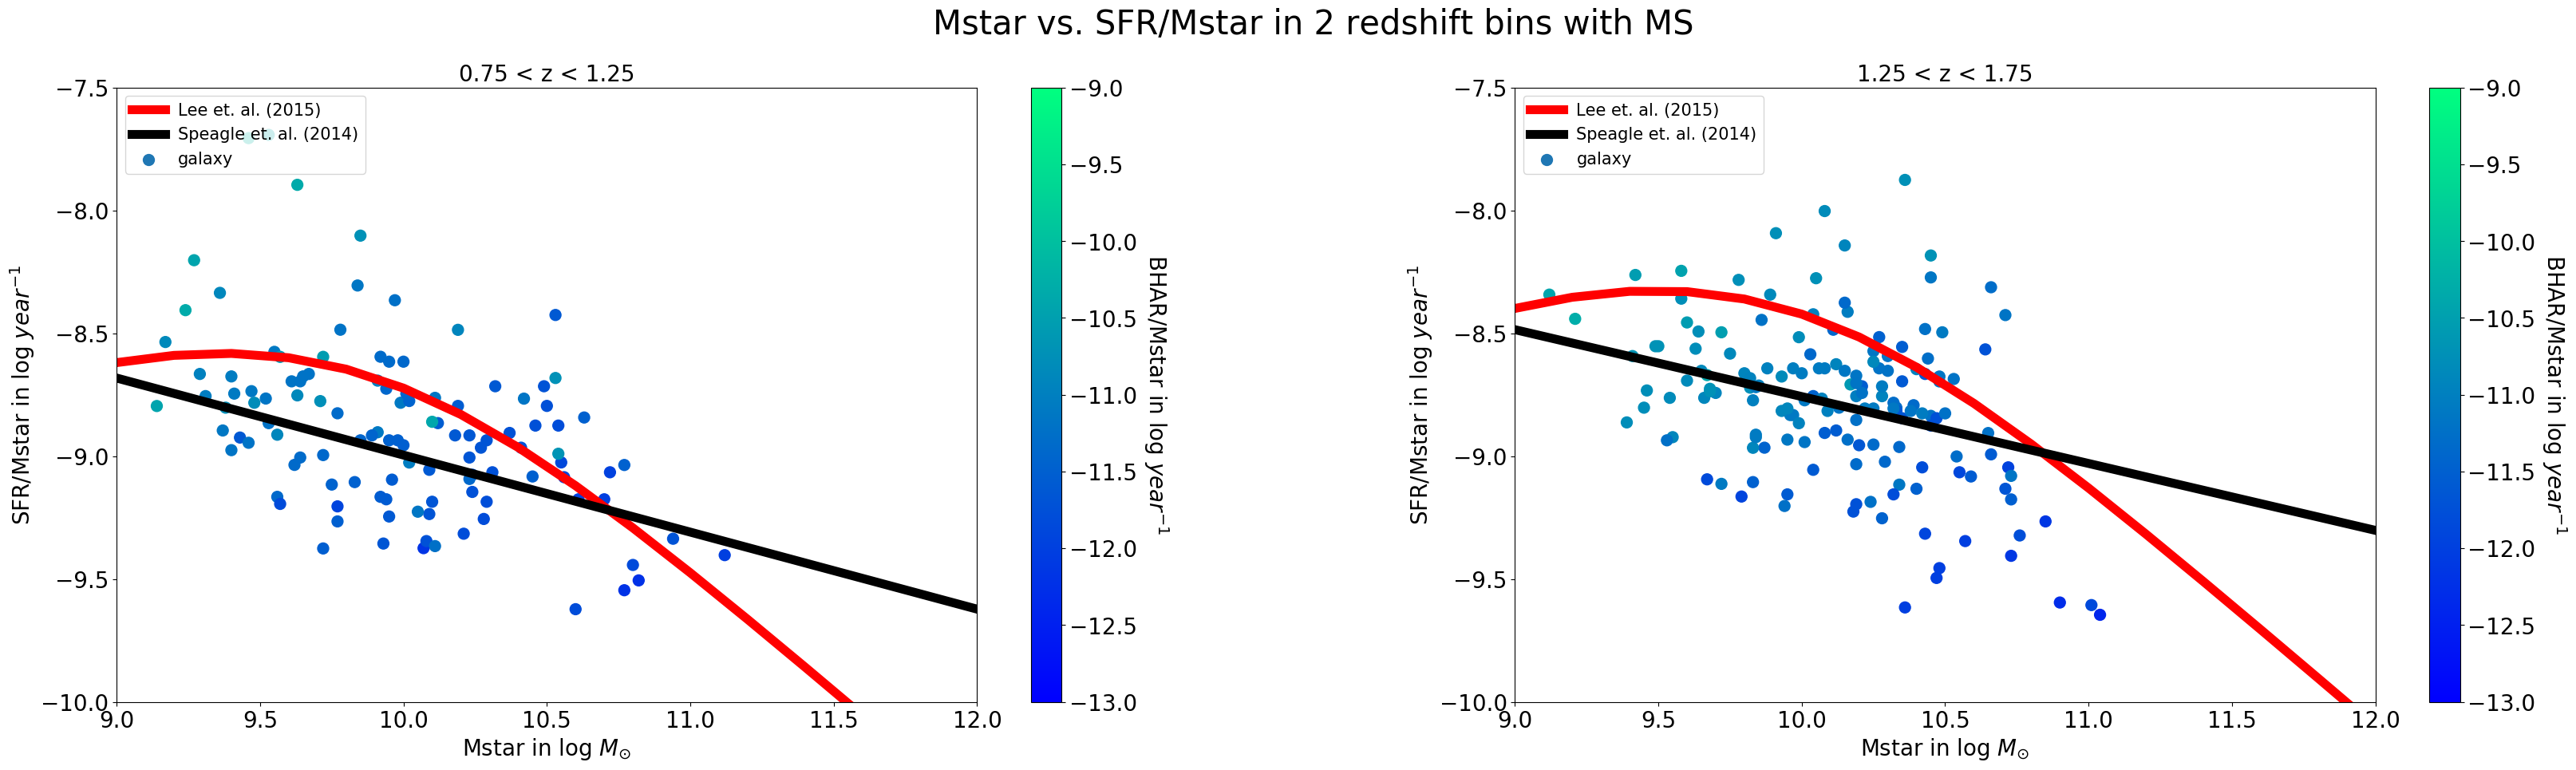

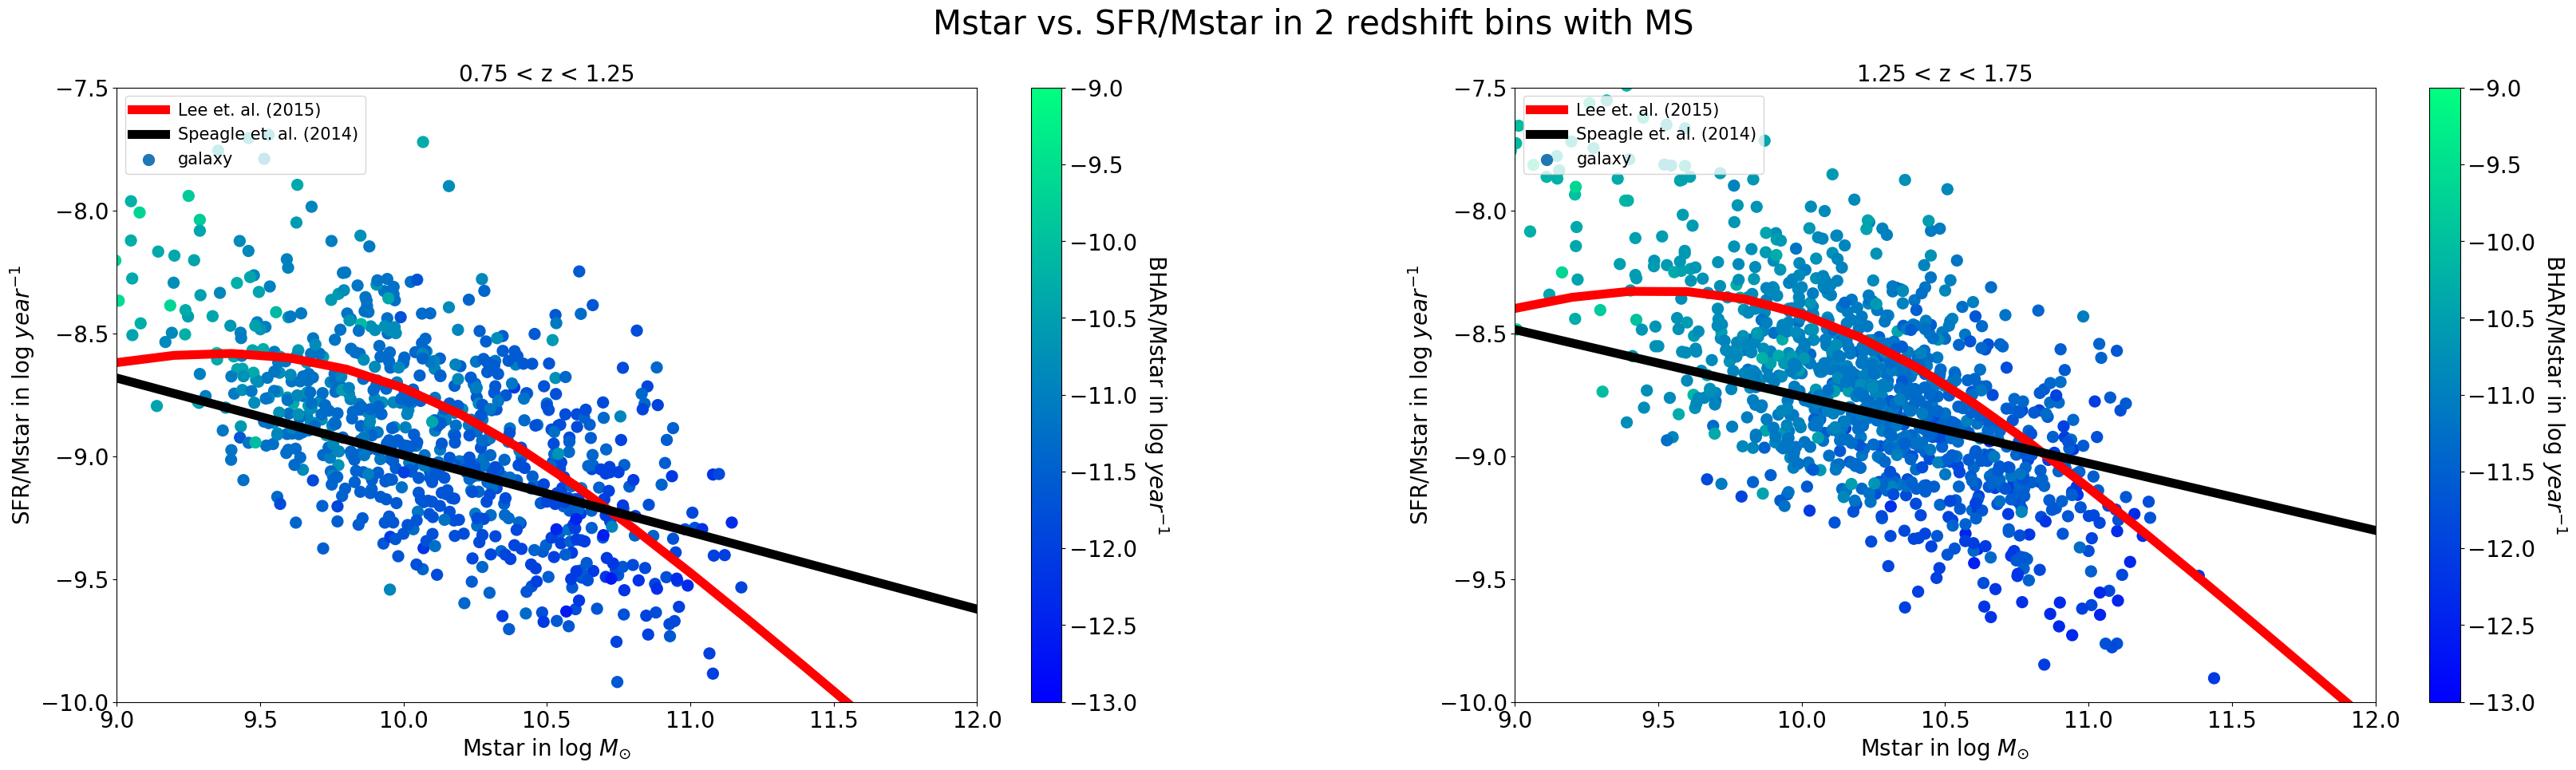

In [2]:
#------------Main Sequence: Mstar vs. sSFR-----------

#import stuff
from astropy.io import fits, ascii
import matplotlib.pyplot as plt
from astropy.table import Table, join
import numpy as np
%config InlineBackend.rc = {}
import matplotlib
matplotlib.rc_file("anaconda/lib/python2.7/site-packages/matplotlib/mpl-data/matplotlibrc")
%matplotlib inline
from matplotlib import cm


from astropy import cosmology
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=69.6, Om0=0.286)

def makeFig(k, v):
    
    #Setting up the figure
    fig = plt.figure()
    fig.set_size_inches(40,10)
    fig.suptitle('Mstar vs. SFR/Mstar in 2 redshift bins with MS', fontsize=30)

    t = ascii.read(k+'_z.txt')

    #lists
    ax = []
    colorm = []
    scat = []
    cb = []
    zbin = v
    
    titles = ['0.75','1.25','1.75','2.25']
    redshifts = [1,1.5,2]
    Mstar = np.arange(9, 13, 0.2)

    for j in range(2): 
        colorm.append(None)
        scat.append(None)
        cb.append(None)
    
    #Function for the main sequence line, turnover
    def ms_turn(z, Mstar):
        #From Lee et. al. in the form 
        # S = S0 - log[1+(10^M/10^M0) ^-gamma]
        if z == 1:
            #ms_turn = 1.3-0.76*np.log10(1+(2*10**10)/(10**Mstar))
            ms_turn = 1.55 - np.log10(1+(10**10.1)/(10**Mstar))**1.25
        elif z==1.5:
            #ms_turn = 2.49-1.45*np.log10(1+(2*10**10)/(10**Mstar))
            ms_turn = 1.9 - np.log10(1+(10**10.2)/(10**Mstar))**1.28
        #elif z==2:
            #ms_turn = 4.23-2.46*np.log10(1+(2*10**10)/(10**Mstar))

        return ms_turn-Mstar
    
    #Function for the main sequence line, linear
    def ms_lin(z, Mstar):
        #log sfr(Mstar, t in Gyr) = the function
        t = cosmo.age(z).value
        ms_lin = (0.84 - 0.026 * t) * Mstar - (6.51 - 0.11 * t)
        return ms_lin-Mstar

    #Setting up the grid
    for i in range(2):
        #Labels and titles
        ax.append(fig.add_subplot(1, 2, i+1))
        ax[i].set_xlabel('Mstar in log $M_{\odot}$', fontsize=20)
        ax[i].set_ylabel('SFR/Mstar in log ${year^{-1}}$', fontsize=20)
        ax[i].set_title(titles[i] + ' < z < ' + titles[i+1], fontsize=20)

        #Axis limits
        ax[i].set_ylim(-10, -7.5)
        ax[i].set_xlim(9, 12)

        #The data
        colorm[i] = t[zbin[i]:zbin[i+1]]['BHAR'] - t[zbin[i]:zbin[i+1]]['M_med']
        scat[i]=ax[i].scatter(t[zbin[i]:zbin[i+1]]['M_med'], t[zbin[i]:zbin[i+1]]['sfr'] - t[zbin[i]:zbin[i+1]]['M_med'],s=100,c=colorm[i],vmin=-13,vmax=-9,cmap=cm.winter, label='galaxy')

        cb[i] = fig.colorbar(scat[i], ax=ax[i])
        cb[i].set_label('BHAR/Mstar in log ${year^{-1}}$', rotation=270, labelpad=30, fontsize=20)

        #Tick mark label size
        ax[i].tick_params(axis='both', which='major', labelsize=20)
        cb[i].ax.tick_params(labelsize=20) 

        #Main Sequence
        ax[i].plot(Mstar, ms_turn(redshifts[i], Mstar), 'r', lw=8, label='Lee et. al. (2015)')
        ax[i].plot(Mstar, ms_lin(redshifts[i], Mstar), 'k', lw=8, label='Speagle et. al. (2014)')

        ax[i].legend(loc='upper left', fontsize=15)

    #Tune spacing between plots. 
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=None)

    fig.savefig(k+'_Mstar_sSFR_MS.png', dpi=300, bbox_inches='tight')

#----------------------------Calling the function to make graphs------------------------------------

#A dictionary of names and zbins
names = {'CANDELS': [0,812,1898,2769],
         'COS': [0,265,507, 650], 
         'EGS': [0,241,640,1015], 
         'GDS': [0,119,279,416],
         'UDS': [0,187,472,688]}

for k, v in names.items():
    makeFig(k, v)